In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

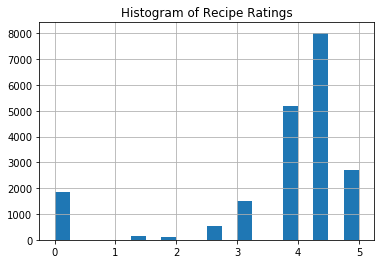

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

In [8]:
plt.scatter(Y, svr.predict(X))

NameError: name 'svr' is not defined

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [ ]:
svr.score(X, Y)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

In [10]:
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [15]:
len(raw_data.columns)

680

In [18]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
(raw_data['calories'] > 2000).sum()

338

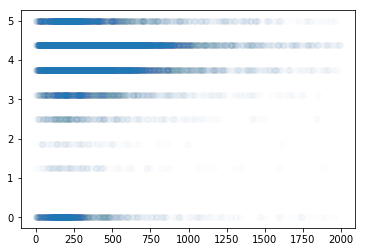

In [29]:
feature_df = raw_data[raw_data['calories'] < 2000].copy()
plt.scatter(feature_df['calories'], feature_df['rating'])

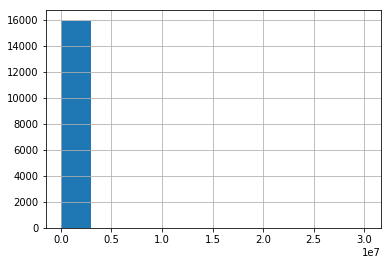

In [30]:
raw_data['calories'].hist()

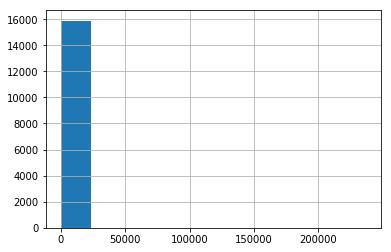

In [31]:
raw_data['protein'].hist()

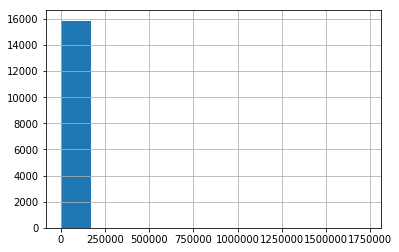

In [32]:
raw_data['fat'].hist()

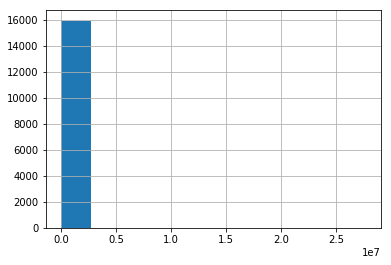

In [33]:
raw_data['sodium'].hist()

In [47]:
raw_data.quantile([.01, .99])

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0.01,0.0,18.00,0.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.99,5.0,3238.64,171.22,207.64,5676.64,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [48]:
feature_df = raw_data[raw_data['calories'] < 3238.64].copy()
feature_df = feature_df[feature_df['sodium'] < 5676.64].copy()
feature_df = feature_df[feature_df['protein'] < 171.22].copy()
feature_df = feature_df[feature_df['fat'] < 207.64].copy()

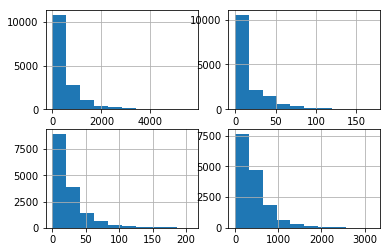

In [49]:
fig, axes = plt.subplots(2, 2)
axes_f = axes.flatten()
feature_df['sodium'].hist(ax=axes_f[0])
feature_df['protein'].hist(ax=axes_f[1])
feature_df['fat'].hist(ax=axes_f[2])
feature_df['calories'].hist(ax=axes_f[3])

In [59]:
feature_df.sum(numeric_only=True) \
          .drop(['rating', 'sodium', 'fat', 'calories'])

protein                  276237.0
#cakeweek                     4.0
#wasteless                    1.0
22-minute meals              15.0
3-ingredient recipes         20.0
30 days of groceries          7.0
advance prep required        71.0
alabama                       1.0
alaska                        2.0
alcoholic                   587.0
almond                      469.0
amaretto                     32.0
anchovy                      27.0
anise                        90.0
anniversary                  85.0
anthony bourdain              2.0
aperitif                      5.0
appetizer                  1028.0
apple                       520.0
apple juice                   5.0
apricot                     217.0
arizona                       8.0
artichoke                   117.0
arugula                     197.0
asian pear                   13.0
asparagus                   153.0
aspen                         1.0
atlanta                       5.0
australia                     5.0
avocado       

In [62]:
feature_df.sum(numeric_only=True) \
          .drop(['rating', 'sodium', 'fat', 'calories', 'protein']) \
          .quantile([.1, .9])

0.1      2.0
0.9    636.7
dtype: float64

In [67]:
frequent_columns = feature_df.sum(numeric_only=True) \
        [feature_df.sum(numeric_only=True)>500].index

In [69]:
feature_df = feature_df[frequent_columns]

In [76]:
feature_df.iloc[:, 5:] = feature_df.iloc[:, 5:].astype('uint8')

In [77]:
feature_df.head()

,rating,calories,protein,fat,sodium,alcoholic,appetizer,apple,backyard bbq,bake,...,summer,thanksgiving,tomato,tree nut free,vegan,vegetable,vegetarian,vinegar,wheat/gluten-free,winter
0,2.500,426.0,30.0,7.0,559.0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3.750,165.0,6.0,7.0,165.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.125,547.0,20.0,32.0,452.0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
5,4.375,948.0,19.0,79.0,1042.0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [78]:
feature_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15476 entries, 0 to 20051
Data columns (total 87 columns):
rating               15476 non-null float64
calories             15476 non-null float64
protein              15476 non-null float64
fat                  15476 non-null float64
sodium               15476 non-null float64
alcoholic            15476 non-null uint8
appetizer            15476 non-null uint8
apple                15476 non-null uint8
backyard bbq         15476 non-null uint8
bake                 15476 non-null uint8
beef                 15476 non-null uint8
bell pepper          15476 non-null uint8
bon appétit          15476 non-null uint8
breakfast            15476 non-null uint8
brunch               15476 non-null uint8
cake                 15476 non-null uint8
carrot               15476 non-null uint8
cheese               15476 non-null uint8
chicken              15476 non-null uint8
chill                15476 non-null uint8
chocolate            15476 non-null uint8

In [79]:
feature_df.groupby('winter')['rating'].mean()

winter
0    3.726695
1    3.922276
Name: rating, dtype: float64

In [87]:
variances = []
for column in feature_df.iloc[:, 5:].columns:
    group_means = feature_df.groupby(column)['rating'].mean()
    variance = np.absolute(group_means[0] - group_means[1])
    variances.append((column, variance))
    print(variance)
    print(feature_df.groupby(column)['rating'].mean())

1.4240496082137857
alcoholic
0    3.812252
1    2.388203
Name: rating, dtype: float64
0.12532970782648434
appetizer
0    3.749913
1    3.875243
Name: rating, dtype: float64
0.037492349352973964
apple
0    3.756979
1    3.794471
Name: rating, dtype: float64
0.22486147663285116
backyard bbq
0    3.748693
1    3.973554
Name: rating, dtype: float64
0.22105484787408347
bake
0    3.706217
1    3.927272
Name: rating, dtype: float64
0.27861442355126265
beef
0    3.746501
1    4.025115
Name: rating, dtype: float64
0.16481388391179985
bell pepper
0    3.752222
1    3.917035
Name: rating, dtype: float64
0.33455024087137364
bon appétit
0    3.601664
1    3.936214
Name: rating, dtype: float64
0.026750557972822886
breakfast
0    3.757319
1    3.784070
Name: rating, dtype: float64
0.09081592542677441
brunch
0    3.754506
1    3.845322
Name: rating, dtype: float64
0.2051448176042947
cake
0    3.750378
1    3.955523
Name: rating, dtype: float64
0.05567161633756834
carrot
0    3.760217
1    3.704545
Nam

In [92]:
sorted(variances, key=lambda x:x[1], reverse=True)[:30]

[('alcoholic', 1.4240496082137857),
 ('drink', 1.373633328184353),
 ('cocktail party', 0.7238376075368036),
 ('roast', 0.3508281116655372),
 ('bon appétit', 0.33455024087137364),
 ('grill/barbecue', 0.28725388351216763),
 ('beef', 0.27861442355126265),
 ('thanksgiving', 0.2724593921623386),
 ('mixer', 0.26295308338979817),
 ('sauté', 0.25350953105528085),
 ('party', 0.24803984536061208),
 ('vegan', 0.23832685111885832),
 ('parmesan', 0.23293054071218178),
 ('cheese', 0.22805953043599247),
 ('backyard bbq', 0.22486147663285116),
 ('fall', 0.22366806312132104),
 ('pork', 0.2213785724130335),
 ('bake', 0.22105484787408347),
 ('peanut free', 0.21265635028894847),
 ('soy free', 0.2117913863437102),
 ('high fiber', 0.20835242692574685),
 ('christmas', 0.205384375460004),
 ('cake', 0.2051448176042947),
 ('winter', 0.1955807257714035),
 ('tree nut free', 0.19223158377218175),
 ('dinner', 0.19125470238859688),
 ('onion', 0.17888708118033225),
 ('herb', 0.1722914709850758),
 ('leafy green', 0.17

In [95]:
feature_df['rating'].describe()

count    15476.000000
mean         3.758239
std          1.283864
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [98]:
feature_df['top_notch'] = feature_df['rating'] >= 4

In [99]:
feature_df['top_notch'].sum()

8420

In [103]:
feature_df.groupby('top_notch').mean()

,rating,calories,protein,fat,sodium,alcoholic,appetizer,apple,backyard bbq,bake,...,summer,thanksgiving,tomato,tree nut free,vegan,vegetable,vegetarian,vinegar,wheat/gluten-free,winter
top_notch,,,,,,,,,,,,,,,,,,,,,
False,2.842971,398.157455,15.998724,21.605159,467.854167,0.052012,0.063634,0.032455,0.033588,0.223073,...,0.201672,0.055130,0.103458,0.334751,0.107851,0.117063,0.360402,0.032455,0.247874,0.157313
True,4.525238,460.241805,19.400238,26.433967,536.360451,0.026128,0.068765,0.034561,0.049881,0.245606,...,0.211520,0.090618,0.108907,0.370428,0.081829,0.098337,0.348219,0.037886,0.245962,0.164608


In [120]:
feature_df['norm_calories'] = (feature_df['calories'] - feature_df['calories'].mean()) /\
                                feature_df['calories'].std()
feature_df['norm_protein'] = (feature_df['protein'] - feature_df['protein'].mean()) /\
                                feature_df['protein'].std()
feature_df['norm_fat'] = (feature_df['fat'] - feature_df['fat'].mean()) /\
                                feature_df['fat'].std()
feature_df['norm_sodium'] = (feature_df['sodium'] - feature_df['sodium'].mean()) /\
                                feature_df['sodium'].std()   
feature_df = feature_df.drop(['calories', 'fat', 'protein', 'sodium'], axis=1)

In [127]:
top_notch_means = feature_df.groupby('top_notch').mean().drop(['rating'],axis=1)
col_batch = np.absolute(top_notch_means.iloc[0] - top_notch_means.iloc[1]) \
    .sort_values(ascending=False)[:30].index

In [129]:
np.absolute(top_notch_means.iloc[0] - top_notch_means.iloc[1]) \
    .sort_values(ascending=False)[:30]

norm_fat          0.185964
norm_calories     0.172259
norm_protein      0.144847
norm_sodium       0.104441
bon appétit       0.102454
soy free          0.049628
peanut free       0.049018
gourmet           0.041718
quick & easy      0.041433
tree nut free     0.035677
thanksgiving      0.035487
drink             0.032923
fall              0.031374
dinner            0.030554
roast             0.030083
cocktail party    0.027639
dessert           0.027212
vegan             0.026022
alcoholic         0.025884
bake              0.022533
christmas         0.021623
grill/barbecue    0.020527
fruit             0.019319
vegetable         0.018726
side              0.017527
pasta             0.017225
pescatarian       0.016534
backyard bbq      0.016293
dairy free        0.014349
vegetarian        0.012184
dtype: float64

In [130]:
col_batch

Index(['norm_fat', 'norm_calories', 'norm_protein', 'norm_sodium',
       'bon appétit', 'soy free', 'peanut free', 'gourmet', 'quick & easy',
       'tree nut free', 'thanksgiving', 'drink', 'fall', 'dinner', 'roast',
       'cocktail party', 'dessert', 'vegan', 'alcoholic', 'bake', 'christmas',
       'grill/barbecue', 'fruit', 'vegetable', 'side', 'pasta', 'pescatarian',
       'backyard bbq', 'dairy free', 'vegetarian'],
      dtype='object')

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
train, test = train_test_split(feature_df, test_size=0.2, random_state=42)
X_test = test[col_batch]
Y_test = test['top_notch']
X_train = train[col_batch]
Y_train = train['top_notch']

In [138]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
c_values = [.25, .5, 1, 2, 4, 8, 16]
for c in c_values:
    svc = SVC(C=c)
    svc.fit(X_train, Y_train)
    print(c, svc.score(X_train, Y_train), svc.score(X_test, Y_test))

0.25 0.5833602584814217 0.5791343669250646
0.5 0.5895799676898223 0.5862403100775194
1 0.5945072697899838 0.5927002583979328
2 0.6026655896607431 0.5981912144702842
4 0.6087237479806139 0.5998062015503876
8 0.6187399030694669 0.601421188630491
16 0.6274636510500807 0.5936692506459949


In [141]:
svc.score(X_train, Y_train)

0.5945072697899838

In [140]:
svc.score(X_test, Y_test)

0.5927002583979328

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.